In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from edu.javerianacali.create_dataset import CreateDataSet
from edu.javerianacali.model.ccn_model import ConvulationalNeuralNetwork
from edu.javerianacali.model.logistic_regression_model import LogisticRegressionModel
from edu.javerianacali.process_images import ProcessImages
from edu.javerianacali.data_aumentation import DataAugmentation
from edu.javerianacali.model.svm_model import SupportVectorMachineModel
directorio = "/data/maestria/maestriasinpro/proyectodegrado/pujc-advocato-filter-project-mngr/assets"


2024-05-26 16:37:56.939067: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-26 16:37:56.942419: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-26 16:37:56.977611: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-26 16:37:57.691912: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# AUMENTO DE DATOS

In [ ]:

from edu.javerianacali.data_aumentation import DataAugmentation

DataAugmentation().augment_images(directorio+'/poquitas'

)

# PROCESAR INAGENES PARA MODELOS DE APRENDIZAJE SUPERVISADO

In [ ]:
path=directorio+'/poquitas'
archivos = os.listdir(path)
for archivo in archivos:
    if archivo.endswith((".jpg", ".JPG", ".jpeg", ".png")):
        ruta_imagen = os.path.join(path, archivo)
        titulos = ["Ori", "SinTex","Sinsomb", archivo]
        imagenes = ProcessImages().procesar_imagen(ruta_imagen,archivo,directorio,200,200)
        ProcessImages().mostrar_imagenes(titulos, imagenes)



# RED NEURONAL

In [ ]:
path=directorio
archivos = os.listdir(path)
for archivo in archivos:
    if archivo.endswith((".jpg", ".JPG", ".jpeg", ".png")):
        ruta_imagen = os.path.join(path, archivo)
        titulos = ["Ori", "SinTex","Sinsomb", archivo]
        imagenes = ProcessImages().procesar_imagen(ruta_imagen,archivo,directorio,200,200)
       # ProcessImages().mostrar_imagenes(titulos, imagenes)



In [ ]:

CreateDataSet().create_dataset_cnn(directorio)

In [ ]:
directorio = "/data/maestria/maestriasinpro/proyectodegrado/pujc-advocato-filter-project-mngr/assets"
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from edu.javerianacali.create_dataset import CreateDataSet
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt
        # Crea un generador de datos de im,target_size=(200,200)agen con normalización500




datagen = ImageDataGenerator(  rescale=1./255,
    horizontal_flip=True,
    fill_mode='nearest')
print(directorio
+'/train')
# Carga las imágenes desde el directorio
generator = datagen.flow_from_directory(
directorio+'/train',
target_size=(200, 200),  
batch_size=32,
class_mode='categorical' )


# Generador de datos de validación
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
    directorio+'/test',# Directorios de entrenamiento y validación

    target_size=(200, 200),
    batch_size=32,
    class_mode='categorical'
)


In [6]:
import tensorflow as tf
from keras.layers import Dropout
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
modelo = Sequential([
   Conv2D(64, (3,3), activation='relu', padding="same", input_shape=(200, 200, 3)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(128, (3,3), activation='relu', padding="same"),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(256, (3,3), activation='relu', padding="same"),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(512, (3,3), activation='relu', padding="same"),  # Capa adicional
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(512, (3,3), activation='relu', padding="same"),  # Capa adicional
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dropout(0.5),  # Capa de abandono para regularización
    Dense(256, activation='relu'),  # Aumentar el número de nodos
    Dense(2, activation='softmax'),
        ])


modelo.summary()

learning_rate = 0.01
optimizer = Adam(learning_rate=learning_rate)
modelo.compile(optimizer=optimizer , # Ajustar la tasa de aprendizaje
    loss='categorical_crossentropy',  
    metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)




class_weights = {0: 1.0, 1: 10.0} 
historial = modelo.fit(
      generator
    epochs=50,  # Aumentar el número de épocas,
    batch_size=64,
      validation_generator,callbacks=[early_stopping, reduce_lr]

)



/home/maucasco/.local/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 200, 200, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 100, 100, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 100, 100, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 50, 50, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 50, 50, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 25, 25, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 25, 25, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 12, 12, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     4,718,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,630,146 (32.92 MB)

 Trainable params: 8,630,146 (32.92 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50


2024-05-26 16:40:46.574915: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 375360000 exceeds 10% of free system memory.
2024-05-26 16:40:48.340448: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 655360000 exceeds 10% of free system memory.
2024-05-26 16:40:48.709020: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 327680000 exceeds 10% of free system memory.
2024-05-26 16:40:51.439113: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 327680000 exceeds 10% of free system memory.
2024-05-26 16:40:52.448517: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 327680000 exceeds 10% of free system memory.


13/13 ━━━━━━━━━━━━━━━━━━━━ 70s 5s/step - accuracy: 0.4871 - loss: 684.3795 - val_accuracy: 0.4540 - val_loss: 0.7174 - learning_rate: 0.0100
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 70s 5s/step - accuracy: 0.5451 - loss: 0.6980 - val_accuracy: 0.5460 - val_loss: 0.6916 - learning_rate: 0.0100
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 71s 5s/step - accuracy: 0.5452 - loss: 0.6868 - val_accuracy: 0.4540 - val_loss: 0.6389 - learning_rate: 0.0100
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 71s 6s/step - accuracy: 0.5503 - loss: 0.8724 - val_accuracy: 0.7478 - val_loss: 0.6503 - learning_rate: 0.0100
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 73s 6s/step - accuracy: 0.6665 - loss: 0.6274 - val_accuracy: 0.8843 - val_loss: 0.3842 - learning_rate: 0.0100
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 73s 6s/step - accuracy: 0.7846 - loss: 0.4566 - val_accuracy: 0.9407 - val_loss: 0.2073 - learning_rate: 0.0100
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 73s 6s/step - accuracy: 0.9017 - loss: 0.2766 - val_accuracy: 0.9466 - 

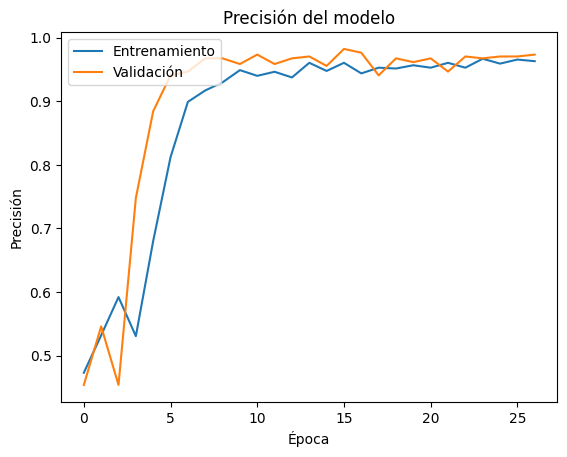

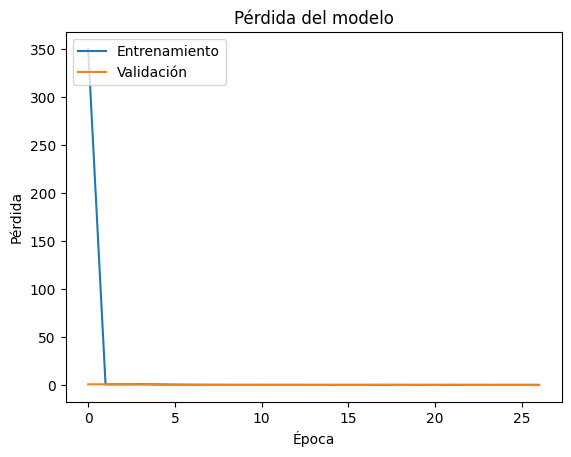

In [7]:

# Gráficos de precisión y pérdida
plt.plot(historial.history['accuracy'])
plt.plot(historial.history['val_accuracy'])  # Precisión de validación
plt.title('Precisión del modelo')
plt.ylabel('Precisión')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Validación'], loc='upper left')
plt.show()

plt.plot(historial.history['loss'])
plt.plot(historial.history['val_loss'])  # Pérdida de validación
plt.title('Pérdida del modelo')
plt.ylabel('Pérdida')
plt.xlabel('Época')# Añade la capa Dense según el tamaño de salida de Flatten


plt.legend(['Entrenamiento', 'Validación'], loc='upper left')
plt.show()

In [ ]:
plot_model(modelo, to_file='/data/maestria/maestriasinpro/proyectodegrado/pujc-advocato-filter-project-mngr/modelo1_cnn.png', show_shapes=True, show_layer_names=True)

11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 561ms/step
Confusion Matrix


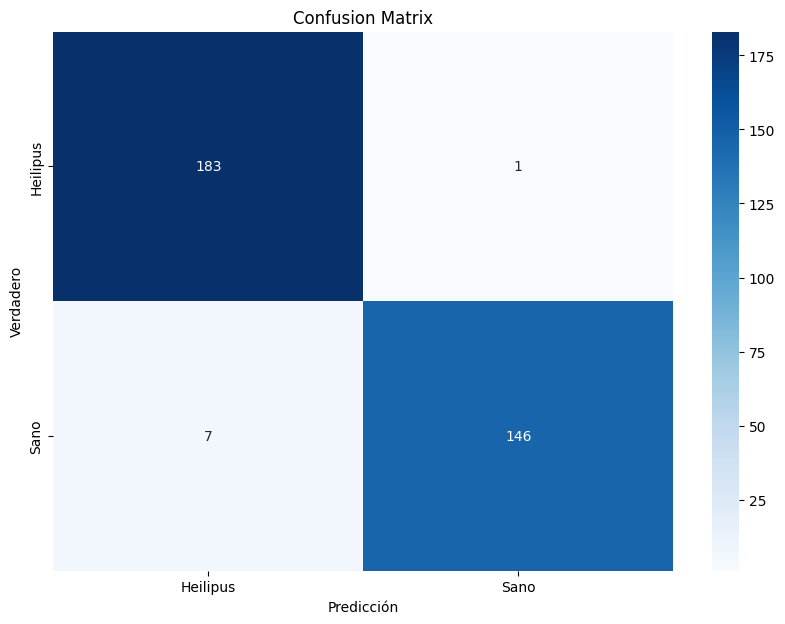

Classification Report
{'0': {'precision': 0.9631578947368421, 'recall': 0.9945652173913043, 'f1-score': 0.9786096256684492, 'support': 184.0}, '1': {'precision': 0.9931972789115646, 'recall': 0.954248366013072, 'f1-score': 0.9733333333333334, 'support': 153.0}, 'accuracy': 0.9762611275964391, 'macro avg': {'precision': 0.9781775868242033, 'recall': 0.9744067917021881, 'f1-score': 0.9759714795008914, 'support': 337.0}, 'weighted avg': {'precision': 0.9767959534274431, 'recall': 0.9762611275964391, 'f1-score': 0.976214157634999, 'support': 337.0}}


,precision,recall,f1-score,support
0,0.963158,0.994565,0.978610,184.000000
1,0.993197,0.954248,0.973333,153.000000
accuracy,0.976261,0.976261,0.976261,0.976261
macro avg,0.978178,0.974407,0.975971,337.000000
weighted avg,0.976796,0.976261,0.976214,337.000000


In [11]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
# Evaluar el modelo en el conjunto de prueba o validación
# Asumiendo que tienes `validation_generator` como tu conjunto de validación/test
y_pred = modelo.predict(validation_generator)
y_test = validation_generator.classes  # Etiquetas verdaderas
print(y_pred)
y_pred = np.argmax(y_pred, axis=1)  # esto cambia por que es una sola neurona hardlim   
print(y_pred)
print(y_test)
# Matriz de confusiónvalidation_generator
print("Confusion Matrix")
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print(cm)
# Obtener nombres de clases desde el generador
class_names = list(validation_generator.class_indices.keys())
print(class_names)
# Visualización de la matriz de confusión
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicción')
plt.ylabel('Verdadero')
plt.title('Confusion Matrix')
plt.show()


# Informe de clasificación

report = classification_report(y_test, y_pred, output_dict=True)
print("Classification Report")
print(report)
report_df = pd.DataFrame(report).transpose()
report_df.to_csv('classification_report_cnn.csv', index=True)

cm = sns.light_palette("blue", as_cmap=True)
styled_df = report_df.style.background_gradient(cmap=cm)
display(styled_df)


In [ ]:
# Si y_pred es unidimensional, no necesitas indexarlo con [:, 1]
if y_pred.ndim == 1:
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    # Visualización de la curva ROC
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Tasa Falsos Positivos')
    plt.ylabel('Tasa de falsos Negativos')
    plt.title('Curva ROC ')
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
from keras.models import Model
import matplotlib.pyplot as plt

# Crear un modelo que devuelva las activaciones de la primera capa convolucional
activation_model = Model(inputs=modelo.input, outputs=modelo.layers[0].output)

# Obtener las activaciones de la primera capa convolucional para la primera imagen en el conjunto de entrenamiento
activations = activation_model.predict(validation_generator[0][0][0].reshape(1, 500, 500, 3))

# Visualizar las activaciones de los primeros 6 filtros
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
for i, ax in enumerate(axes.flat):
    ax.imshow(activations[0, :, :, i], cmap='viridis')
    ax.axis('off')
plt.show()

In [ ]:
from sklearn.model_selection import KFold
import numpy as np

# Suponiendo que tienes todas tus imágenes y etiquetas cargadas en X e Y
# X, Y = load_data()

n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True)

fold_no = 1
for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    Y_train, Y_val = Y[train_index], Y[val_index]

    # Crear el modelo de CNN aquí
    modelo = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(100, 130, 3)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(2, activation='softmax')
    ])

    modelo.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

    # Entrenar el modelo
    modelo.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=10, batch_size=32)

    # Evaluar el modelo
    scores = modelo.evaluate(X_val, Y_val, verbose=0)
    print(f'Score for fold {fold_no}: {modelo.metrics_names[1]} of {scores[1]*100}%')
    
    fold_no += 1

In [ ]:
# Guardar el modelo en un archivo
modelo.save('/home/maucasco/Documents/maestria/proyecto_grado/pujc-advocato-filter-project-mngr/modelo/modelo_cnn.h5')


In [ ]:
# Cargar el modelo desde un archivo
from keras.models import load_model
modelo = load_model('/home/maucasco/Documents/maestria/proyecto_grado/pujc-advocato-filter-project-mngr/modelo/modelo_cnn.h5')

In [ ]:

from keras.preprocessing import image
import numpy as np
# Load and preprocess the image
img_path = '/home/maucasco/Downloads/images.jpeg'
imagen = cv2.imread(img_path)[100:, :]
imagen_sin_texto,aguacate_solo, redimenciada = ProcessImages().procesar(imagen,500,500)
img_array = image.img_to_array(redimenciada)


plt.imshow(redimenciada, cmap='gray')
plt.show()
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

# Make predictions
predictions = modelo.predict(img_array)
print(predictions)